# TP 3 : SVM

## 0 - Introduction

L'objectif de ce premier TP est d'étudier le fonction des SVM.
Il sera à réaliser en python 3. Les librairies utilisées sont installées sur les machines de l'université et de l'Ensicaen, vous pouvez néanmoins les installer sur vos propres machines à l'aide de l'utilitaire pip présent par défaut avec python.
	
N'hésitez pas à regarder régulièrement la documentation de ces librairies, des exemples d'utilisation accompagnent généralement l'explication de chaque fonction.


Langage utilisé:
- Python 3: https://docs.python.org/3/

Librairie de math:
- Numpy: https://docs.scipy.org/doc/numpy/reference/
- Scipy: https://docs.scipy.org/doc/scipy/reference/

Librairie d'affichage de données:
- Matplotilb: https://matplotlib.org/contents.html

Librairie de traitement d'image:
- Scikit-image: https://scikit-image.org/

Librairie d'apprentissage automatique:
- Scikit-learn: http://scikit-learn.org

**Afin d'avoir un code optimisé, vous éviterez d'utiliser les instructions python3 `if`, `for` et `while` (sauf mention contraire dans le sujet).**

In [1]:
#Ce bloc contient tous les imports nécessaires pour ce TP.

# import de fonctions mathématiques
import numpy as np
import scipy as sc

# import fonction d'affichage
import matplotlib
import matplotlib.pyplot as plt


# import librairies d'apprentissage automatique
import sklearn as skl
import sklearn.datasets as data
import sklearn.model_selection
import sklearn.svm

#Gestion des fichiers csv
import csv

/usr/local/tp_python/lib/python3.10/site-packages/numpy/lib/scimath.py:46: RuntimeWarning: divide by zero encountered in log
  _ln2 = nx.log(2.0)


Afin de vous guider dans la détection d'erreur dans votre code. Nous avons introduit des blocs de tests. Il n'est pas nécessaire que vous compreniez en détail le code de ces blocs. Vous devez uniquement les exécuter et corriger les erreurs de votre code si un des tests n'est pas valide. Il est important de noter que le fait de valider le test ne garantit pas que votre code ne contient pas d'erreur. Par contre un test non validé implique nécessairement que votre code contient une erreur.

- Si tout les tests sont valides, vous aurez un message écrit en vert indiquant : Ok - Tous les tests sont validés.
- Si un des tests n'est pas valide, vous aurez un message écrit en rouge indiquant : Au moins un test n'est pas validé.
- Pour les tests non valides, vous aurez des éléments d'information sur le test non valide. En particulier, un message écrit en jaune vous détaillera la nature du test échoué.

Voici un exemple d'utilisation. Le bloc suivant est censé contenir l'affectation de la valeur 42 à la variable `a`. Le bloc de test d'après vérifie que vous avez correctement effectué l'affectation. Exécutez les deux blocs avec des valeurs de `a` correcte et incorrecte.
Vous devez supprimer la ligne `raise NotImplementedError()` qui indique que vous n'avez pas encore fait l'implémentation.

In [2]:
a = 42

In [3]:
# Ce bloc permet de valider votre code. Vous ne devez pas le modifier.  
try:
    np.testing.assert_equal(a,42,err_msg="\033[93m {}\033[00m" .format('Test 1 : a n\'est pas égale à 42. Vérifiez que a==42'))
except Exception as e: 
    print("\033[91m {}\033[00m" .format('KO - Au moins un test n\'est pas validé')) 
    print('Information sur le test non valide:')
    print(e)
    raise e
else:
    print("\033[92m {}\033[00m" .format('Ok - Tous les tests sont validés.')) 

 Ok - Tous les tests sont validés.


## 1 - Récupération des données d'apprentissage et de test


Nous  allons  travailler  sur  des  donnees  d’apprentissage  reparties  en  deux  classes  non  lineairement séparables. Ces données sont dans le fichier `data2D.csv` disponible sur le moodle du cours. Chaque ligne de ce fichier comporte trois valeurs : des coordonnées bidimensionnelles et la classe (0 ou 1). Pour charger les données nous procéderons ainsi :

In [29]:
def lireCSV(fichier):
    data = []
    with open(fichier, 'r') as csvfile:
        spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
        tmp =[]
        for row in spamreader:
            tmp.append(row)
        data.append(tmp)
    return np.array(data[0])

data = lireCSV('data2D.csv')

X = data[:,:2].astype(np.float32)
y = data[:,2].astype(np.int_)

In [30]:
print(X)
print(y)

[[34.62366  78.0247  ]
 [30.28671  43.894997]
 [35.84741  72.9022  ]
 [60.1826   86.308556]
 [79.03274  75.344376]
 [45.08328  56.316372]
 [61.106663 96.51143 ]
 [75.02474  46.554012]
 [76.098785 87.42057 ]
 [84.43282  43.533394]
 [95.86156  38.225277]
 [75.01366  30.603264]
 [82.30705  76.481964]
 [69.364586 97.71869 ]
 [39.538338 76.03681 ]
 [53.97105  89.20735 ]
 [69.070145 52.74047 ]
 [67.94685  46.678574]
 [70.66151  92.92714 ]
 [76.97878  47.575962]
 [67.372025 42.83844 ]
 [89.67677  65.79936 ]
 [50.53479  48.855812]
 [34.212063 44.20953 ]
 [77.924095 68.97236 ]
 [62.271015 69.95446 ]
 [80.19018  44.82163 ]
 [93.11439  38.80067 ]
 [61.830208 50.256107]
 [38.785805 64.99568 ]
 [61.379288 72.807884]
 [85.40452  57.051983]
 [52.10798  63.127625]
 [52.045406 69.43286 ]
 [40.236893 71.16775 ]
 [54.635105 52.213886]
 [33.9155   98.86944 ]
 [64.17699  80.90806 ]
 [74.78925  41.573414]
 [34.18364  75.23772 ]
 [83.9024   56.308044]
 [51.54772  46.85629 ]
 [94.44337  65.568924]
 [82.36875 

Affichez les données en utilisant une couleur différente pour chaque classe.

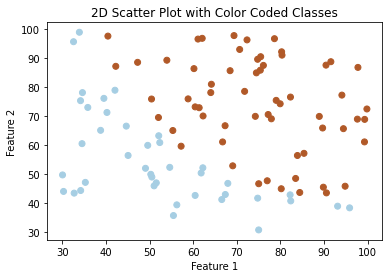

In [31]:
# Plotting the data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('2D Scatter Plot with Color Coded Classes')
plt.show()

En utilisant la fonction `train_test_split` de `scikit-learn` ( https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html ) découpez les données en deux ensembles (train et val).
Vous utiliserez 40% des données pour test. Vous nommerez les données `X_train` et `X_test` et les labels `y_train` et `y_test`.

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)


In [33]:
# Ce bloc permet de valider votre code. Vous ne devez pas le modifier.  
try:
    np.testing.assert_equal(X_train.shape[0]+X_test.shape[0],X.shape[0],err_msg="\033[93m {}\033[00m" .format('Test 1 : Certains exemples ne sont utilisé ni dans Train ni dans Test.'))
    np.testing.assert_equal(X_test.shape[0],X.shape[0]*.4,err_msg="\033[93m {}\033[00m" .format('Test 2 : La proportion des exemples utilisés pour Test n\'est pas correct.'))
    np.testing.assert_equal(X_test.shape[1],2,err_msg="\033[93m {}\033[00m" .format('Test 3 : Il manque des dimensions aux exemples de Test.'))
    np.testing.assert_equal(y_train.dtype,np.int_,err_msg="\033[93m {}\033[00m" .format('Test 4 : Les labels d\'entrainement doivent être des entiers.'))
    np.testing.assert_equal(y_test.dtype,np.int_,err_msg="\033[93m {}\033[00m" .format('Test 5 : Les labels de test doivent être des entiers.'))
except Exception as e: 
    print("\033[91m {}\033[00m" .format('KO - Au moins un test n\'est pas validé')) 
    print('Information sur le test non valide:')
    print(e)
    raise e
else:
    print("\033[92m {}\033[00m" .format('Ok - Tous les tests sont validés.')) 
    

 Ok - Tous les tests sont validés.


Affichez sur une même figure les données d'apprentissage et de test. Vous utiliserez une couleur différente par classe et un marker différent pour train et test.

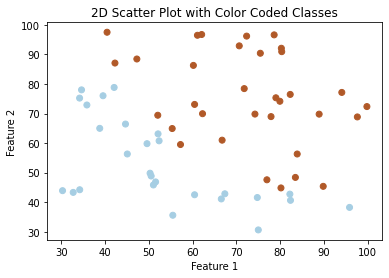

In [34]:
# Plotting the training data
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('2D Scatter Plot with Color Coded Classes')
plt.show()

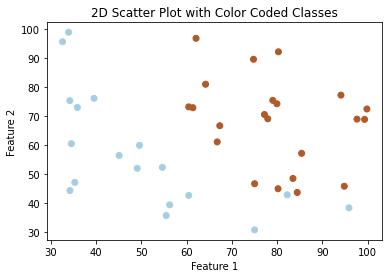

In [19]:
# Plotting the testing data
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.Paired)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('2D Scatter Plot with Color Coded Classes')
plt.show()

## 2 - SVM à l'aide de Scikit-learn 


Nous utiliseron dans cette partie les fonctions de la librairie `scikit-learn` pour l'utilisation des SVM. Les fonctions de la librairie exploitent eux même une autre librairie écrite en C appelé `libSVM`.

Nous étudierons dans cette partie les différents éléments important des SVM à savoir:
- le choix de la fonction noyau
- le choix des paramètres associé à ce noyau (degré pour un noyau polynomail, largueur de bande pour un noyau Gausien...)
- le choix des paramètres de régularisations.

Pour plus d'information sur l'utilisation des SVM dans `scikit-learn`, vous pouvez vous référer à la documentation : https://scikit-learn.org/stable/modules/svm.html

### 2.1 - SVM polynomial par défaut


En vous basant sur la documentation ( https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC ), apprenez un SVM à noyau polynomial sur les données d'apprentissage que vous nommerez `clf_poly`.

In [47]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score



X, y = sklearn.datasets.make_classification(n_samples=100,
                                                   n_features=2,
                                                   n_redundant=0,
                                                   n_clusters_per_class=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35)

# kernel = 'poly'
clf_poly = SVC(kernel='poly', gamma='auto')
clf_poly.fit(X_train, y_train)

y_ploy_predict = clf_poly.predict(X_test)
score_poly = roc_auc_score(y_test, y_ploy_predict)

print(y_ploy_predict)
print(score_poly)


[1 1 0 1 1 0 0 0 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0]
0.8571428571428572


In [48]:

# Ce bloc permet de valider votre code. Vous ne devez pas le modifier.  
try:
    np.testing.assert_equal(type(clf_poly),skl.svm._classes.SVC,err_msg="\033[93m {}\033[00m" .format('Test 1 : Le type de clf_poly est incorrect.'))
    try:
        assert 'support_' in clf_poly.__dict__
    except Exception as e:
        raise AssertionError("\033[93m {}\033[00m" .format('Test 2 : Vous n\'avez pas appris clf_poly.'))
except Exception as e: 
    print("\033[91m {}\033[00m" .format('KO - Au moins un test n\'est pas validé')) 
    print('Information sur le test non valide:')
    print(e)
    raise e
else:
    print("\033[92m {}\033[00m" .format('Ok - Tous les tests sont validés.')) 

 Ok - Tous les tests sont validés.


En utilisant un code similaire au TP2, affichez avec deux couleurs différentes les zones associés à chaque classe retournée par le classifieur que vous venez d'apprendre.

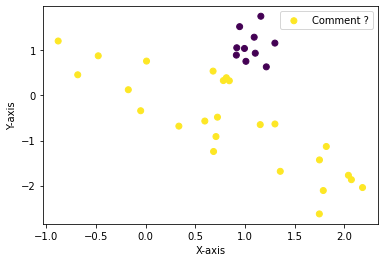

In [49]:
labels = y_ploy_predict

# Plot the distributions
plt.scatter(X_test[:, 0], X_test[:, 1], c=labels, cmap='viridis', label= "Comment ?")

# Add labels and legend
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()

# Show the plot
plt.show()

En utilisant la fonction `classification_report` ( https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html ) de `scikit_learn`, affichez les performances du classifieurs sur la base de test.

In [51]:
from sklearn.metrics import classification_report

score = classification_report(y_test, y_ploy_predict)

print(score)

              precision    recall  f1-score   support

           0       1.00      0.71      0.83        14
           1       0.84      1.00      0.91        21

    accuracy                           0.89        35
   macro avg       0.92      0.86      0.87        35
weighted avg       0.90      0.89      0.88        35



### 2.2 Influence du degré du polynomial pour un SVM polynomial

Faites varier le degrée du polynôme utilisé pour la fonction noyau entre 1 et 30 (en prenant une valeur sur 3) et visualisez le changement dans la fonction apprise.

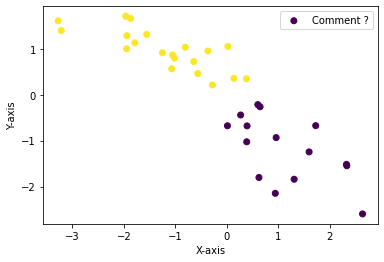

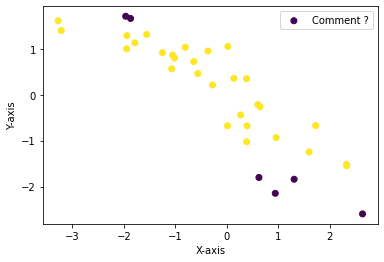

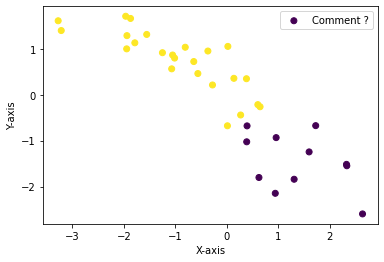

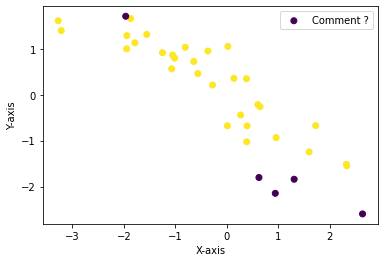

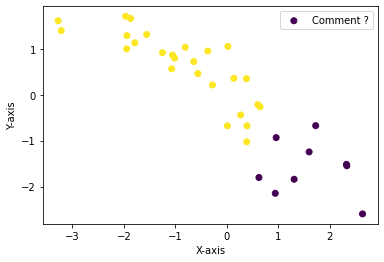

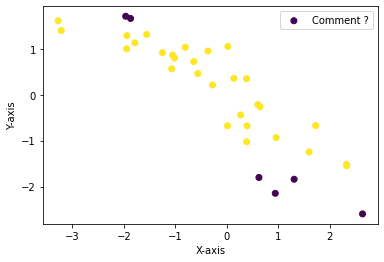

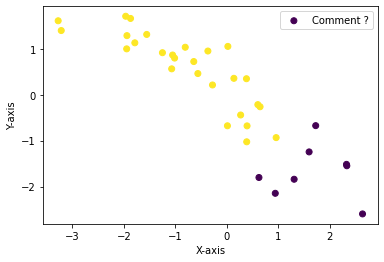

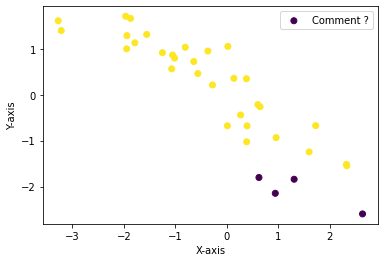

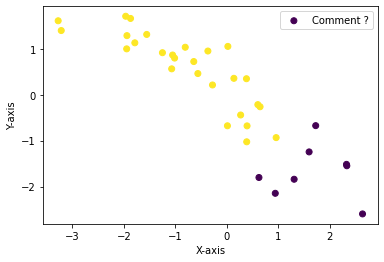

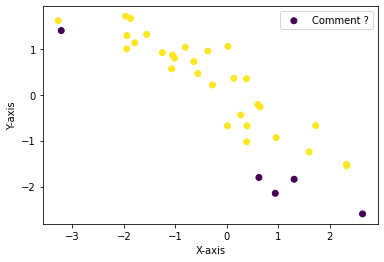

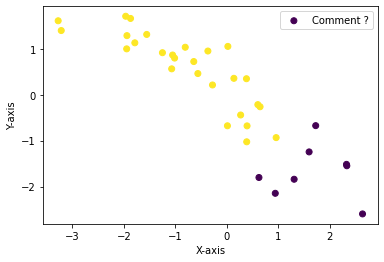

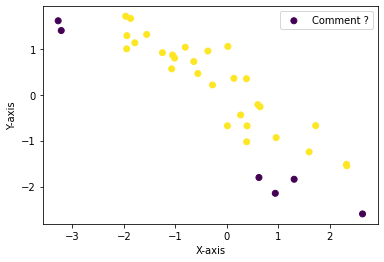

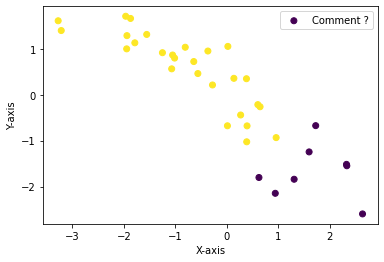

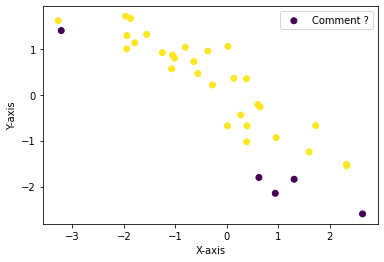

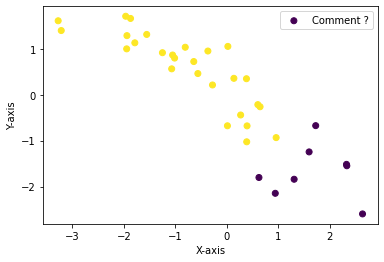

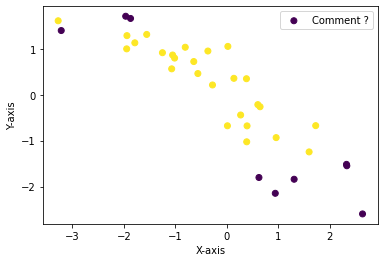

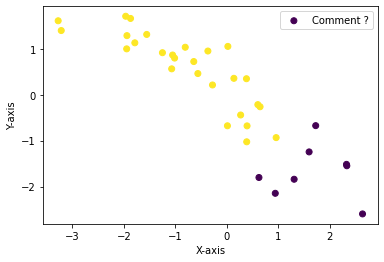

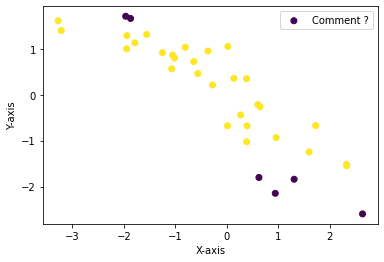

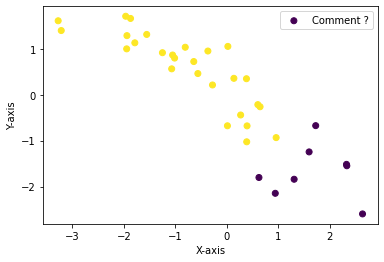

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

## le changerment s'arrete apres un certin degree !

X, y = sklearn.datasets.make_classification(n_samples=100,
                                                   n_features=2,
                                                   n_redundant=0,
                                                   n_clusters_per_class=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35)

for deg in range(1,30):
    
    # kernel = 'poly'
    clf_poly = SVC(kernel='poly', gamma='auto', degree=deg)
    clf_poly.fit(X_train, y_train)

    y_ploy_predict = clf_poly.predict(X_test)

    labels = y_ploy_predict

    # Plot the distributions
    plt.scatter(X_test[:, 0], X_test[:, 1], c=labels, cmap='viridis', label= "Comment ?")

    # Add labels and legend
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.legend()

    # Show the plot
    plt.show()


### 2.3 Influence du paramètre de régularisation sur un SVM polynomial

Apprenez des classifieurs polynomiaux de degré 2 avec un paramètre de régularisation variant de 0.001 à 100 pour chaque puissance de 10.

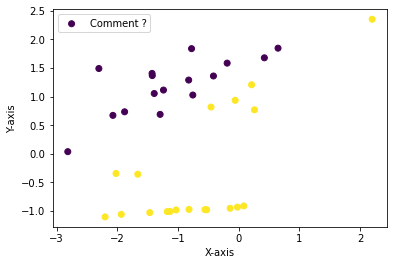

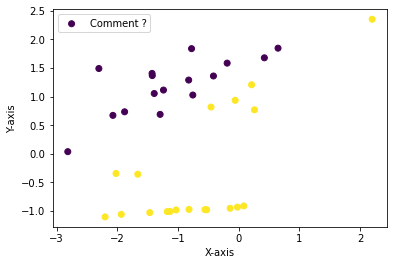

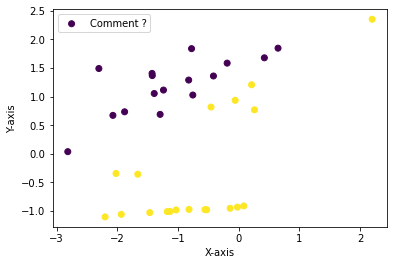

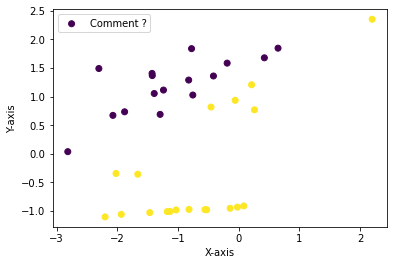

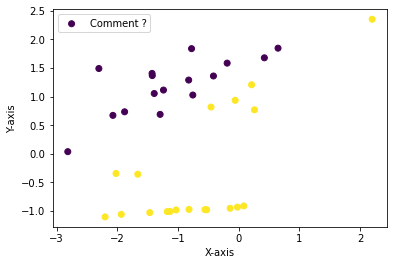

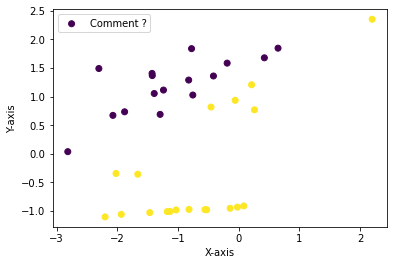

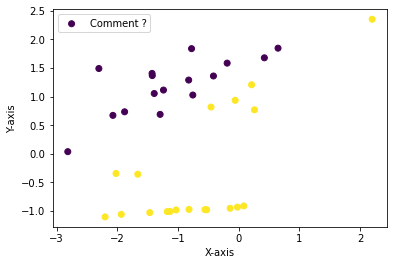

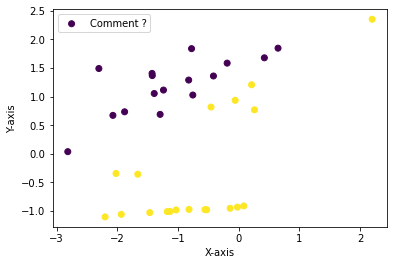

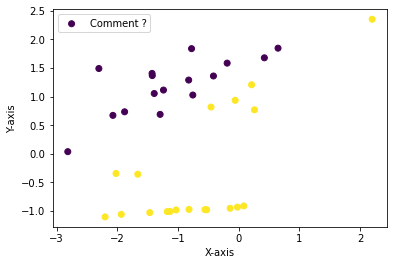

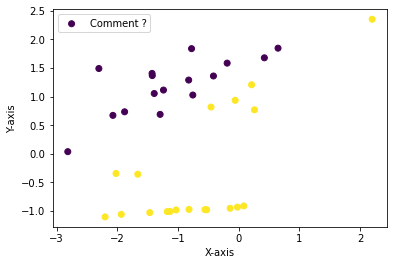

In [4]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score



X, y = sklearn.datasets.make_classification(n_samples=100,
                                                   n_features=2,
                                                   n_redundant=0,
                                                   n_clusters_per_class=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35)

for reg_var in range(1,100,10):
    
    # kernel = 'poly'
    clf_poly = SVC(kernel='poly', gamma='auto', degree=2, C=reg_var)
    clf_poly.fit(X_train, y_train)

    y_ploy_predict = clf_poly.predict(X_test)

    labels = y_ploy_predict

    # Plot the distributions
    plt.scatter(X_test[:, 0], X_test[:, 1], c=labels, cmap='viridis', label= "Comment ?")

    # Add labels and legend
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.legend()

    # Show the plot
    plt.show()


### 2.4 SVM avec d'autres noyaux

Comparez les résultats de classification en changeant de noyau. Vous testerez notamment le noyau linéaire et le noyau gaussien.

In [10]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


X, y = sklearn.datasets.make_classification(n_samples=100,
                                                   n_features=2,
                                                   n_redundant=0,
                                                   n_clusters_per_class=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35)

# kernel = 'poly'
clf_poly = SVC(kernel='poly', gamma='auto')
clf_poly.fit(X_train, y_train)

y_ploy_predict = clf_poly.predict(X_test)
score_poly = classification_report(y_test, y_ploy_predict)

print(score_poly)

# kernel = 'rbf'
clf_rbf = SVC(kernel='rbf', gamma='auto')
clf_rbf.fit(X_train, y_train)

y_rbf_predict = clf_rbf.predict(X_test)
score_rbf = classification_report(y_test, y_rbf_predict)

print(score_rbf)

# kernel = 'linear'
clf_linear = SVC(kernel='linear', gamma='auto')
clf_linear.fit(X_train, y_train)

y_linear_predict = clf_linear.predict(X_test)
score_linear = classification_report(y_test, y_linear_predict)

print(score_linear)

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        17
           1       1.00      0.89      0.94        18

    accuracy                           0.94        35
   macro avg       0.95      0.94      0.94        35
weighted avg       0.95      0.94      0.94        35

              precision    recall  f1-score   support

           0       0.81      1.00      0.89        17
           1       1.00      0.78      0.88        18

    accuracy                           0.89        35
   macro avg       0.90      0.89      0.88        35
weighted avg       0.91      0.89      0.88        35

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        17
           1       1.00      0.89      0.94        18

    accuracy                           0.94        35
   macro avg       0.95      0.94      0.94        35
weighted avg       0.95      0.94      0.94        35



### 2.5 La validation croisée

Le nombre de paramètres à explorer est potentiellement important et il n'est pas toujours évident de connaiter les meilleurs combinaisons à utiliser pour un problème donné. `Scikit-learrn` met à disposition plusieurs solution pour explorer les paramètres possibles et calculer les performances finales. Vous retrouverez ces information à l'adresse: https://scikit-learn.org/stable/model_selection.html .
Nous allons dans cette partie, nous concentrer plus particulièrement sur la validation croisée: https://scikit-learn.org/stable/modules/cross_validation.html .
Commencez par lire en détail la documentation.

À l'aide de la classe `GridSearchCV` https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html , trouvez les meilleurs paramètres parmi les configurations suivantes pour une fonction de coût de type `accuracy`:
- Noyaux gaussiens avec gamma parmi [$10^{-1},10^{-2},10^{-3}$] et C parmi [$0.1,1,10,100$],
- Noyaux polynomial de degré 1, 2 ou 3; décalage 0.1,1 ou 10 ;  C parmi [$0.1,1,10,100$].

In [79]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


X, y = sklearn.datasets.make_classification(n_samples=100,
                                                   n_features=2,
                                                   n_redundant=0,
                                                   n_clusters_per_class=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35)

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


##You can use GridSearchCV for hyperparameter tuning in regression problems as well.
##The process is quite similar to what we discussed earlier for classification problems,
##but you would use regression-specific scoring metrics.

# Configurations pour les noyaux gaussiens
param_grid_rbf = {'kernel': ['rbf'], 'C': [0.1, 1, 10, 100], 'gamma': [10**(-1), 10**(-2), 10**(-3)]}

# Configurations pour les noyaux polynomiaux
param_grid_poly = {'kernel': ['poly'], 'C': [0.1, 1, 10, 100], 'degree': [1, 2, 3], 'coef0': [0.1, 1, 10]}

# Création du modèle SVM
svm_model = SVC()

# Recherche sur la grille pour les noyaux gaussiens
grid_search_rbf = GridSearchCV(estimator=svm_model, param_grid=param_grid_rbf, scoring='accuracy', cv=5)
grid_search_rbf.fit(X_train, y_train)

# Recherche sur la grille pour les noyaux polynomiaux
grid_search_poly = GridSearchCV(estimator=svm_model, param_grid=param_grid_poly, scoring='accuracy', cv=5)
grid_search_poly.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'coef0': [0.1, 1, 10],
                         'degree': [1, 2, 3], 'kernel': ['poly']},
             scoring='accuracy')

 Calculez les performances de classification de la meilleur solution et  affichez la frontière de décision et les vecteurs de support de la meilleure combinaison de paramètre

In [17]:
# Affichage des meilleurs paramètres et scores
print("Meilleurs paramètres pour le noyau gaussien:", grid_search_rbf.best_params_)
print("Meilleur score pour le noyau gaussien:", grid_search_rbf.best_score_)

print("Meilleurs paramètres pour le noyau polynomial:", grid_search_poly.best_params_)
print("Meilleur score pour le noyau polynomial:", grid_search_poly.best_score_)

Meilleurs paramètres pour le noyau gaussien: {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
Meilleur score pour le noyau gaussien: 0.9692307692307693
Meilleurs paramètres pour le noyau polynomial: {'C': 1, 'coef0': 10, 'degree': 3, 'kernel': 'poly'}
Meilleur score pour le noyau polynomial: 0.9692307692307693


## 3 - SVM à l'aide de l'algorithme SMO


Nous allons dans cette partie faire une implémentation simplifiée de l'algorithme SMO (Sequential minimal optimization) pour la résolution d'un SVM dans le dual. L'algorithème SMO est un algorithme itératif. À chaque itération deux multiplicateurs de lagrange $\alpha_i$ et $\alpha_j$ sont choisis et optimisés sur la fonction de coût du SVM. Les nouvelles valeurs $\alpha'_i$ et $\alpha'_j$ sont choisies de manière à satisfaire $y_1\alpha'_1+y_2\alpha'_2= y_1\alpha_1+y_2\alpha_2 = cst$ afin de respecter la contrainte $\sum_i \alpha_i y_i = 0$.

Nous nous appuierons dans cette partie sur la solution proposée dans le livre *Machine Learning in action* de Peter Harrigton, édition Manning.

Les labels précédement utilisés sont 0 ou 1. Définissez `y_train2` et `y_test2` correspondant aux labels ramenené au valeurs -1 et 1. Dans la suite de cette partie, nous utiliserons uniquement ces nouvelles variables.

In [45]:
from sklearn.model_selection import train_test_split

def lireCSV(fichier):
    data = []
    with open(fichier, 'r') as csvfile:
        spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
        tmp =[]
        for row in spamreader:
            tmp.append(row)
        data.append(tmp)
    return np.array(data[0])

data = lireCSV('data2D.csv')

X = data[:,:2].astype(np.float32)
y = data[:,2].astype(np.int_)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, shuffle =False)

# Ensemble de tous les labels entre -1 et 1:
y2 = y*2-1

X_train, X_test, y_train2, y_test2 = train_test_split(X, y2, test_size=0.40, shuffle =False)

In [46]:
# Ce bloc permet de valider votre code. Vous ne devez pas le modifier.  
try:
    np.testing.assert_equal(len(y_train2),60,err_msg="\033[93m {}\033[00m" .format('Test 1 : Le nombre de valeurs dans y_train2 est incorrect.'))
    np.testing.assert_equal(len(y_test2),40,err_msg="\033[93m {}\033[00m" .format('Test 2 : Le nombre de valeurs dans y_test2 est incorrect.'))
    np.testing.assert_equal(y_train2.dtype,np.int_,err_msg="\033[93m {}\033[00m" .format('Test 3 : Le type des valeurs dans y_train2 est incorrect.'))
    np.testing.assert_equal(y_test2.dtype,np.int_,err_msg="\033[93m {}\033[00m" .format('Test 4 : Le type des valeurs dans y_test2 est incorrect.'))
    np.testing.assert_equal(np.min(y_train2),-1,err_msg="\033[93m {}\033[00m" .format('Test 5 : Les valeurs minimal de y_train2 doivent être -1.'))
    np.testing.assert_equal(np.min(y_test2 ),-1,err_msg="\033[93m {}\033[00m" .format('Test 6 : Les valeurs minimal de y_test2 doivent être -1.'))
    np.testing.assert_equal(np.max(y_train2),1,err_msg="\033[93m {}\033[00m" .format('Test 7 : Les valeurs maximal de y_train2 doivent être 1.'))
    np.testing.assert_equal(np.max(y_test2 ),1,err_msg="\033[93m {}\033[00m" .format('Test 8 : Les valeurs maximal de y_test2 doivent être 1.'))
    np.testing.assert_equal(y_train2, 2*y_train - 1, err_msg="\033[93m {}\033[00m".format('Test 9 : Certaines valeurs de y_train2 sont fausses.'))

except Exception as e: 
    print("\033[91m {}\033[00m" .format('KO - Au moins un test n\'est pas validé')) 
    print('Information sur le test non valide:')
    print(e)
    raise e
else:
    print("\033[92m {}\033[00m" .format('Ok - Tous les tests sont validés.')) 

 Ok - Tous les tests sont validés.


Écrivez une fonction qui tire un entier entre 0 et n (non compris) sauf le nombre j. Pour faire cela vous tirez un entier entre 0 et n-1 et y ajouter +1 si le nombre tiré est supérieur ou égale à j. Vous pouvez utiliser un `if` pour cette question.

In [47]:
import random

def tirage_without(n, j):
    random_number = random.randint(0, n - 2)
    if random_number >= j:
        random_number += 1
    return np.int64(random_number)

In [48]:
# Ce bloc permet de valider votre code. Vous ne devez pas le modifier.  
try:
    for i in range(1000):
        np.testing.assert_equal(type(tirage_without(10,4)),np.int_,
                                err_msg="\033[93m {}\033[00m" .format('Test 1 : Les valeurs de tirage_without doivent être entière.')
                               )
        np.testing.assert_array_less(tirage_without(10,4),10,
                                err_msg="\033[93m {}\033[00m" .format('Test 2 : Les valeurs de tirage_without doivent être entre 0 et n.')
                               )
        np.testing.assert_array_less(-1,tirage_without(10,4),
                                err_msg="\033[93m {}\033[00m" .format('Test 3 : Les valeurs de tirage_without doivent être entre 0 et n.')
                               )
        np.testing.assert_array_less(0.1,np.abs(tirage_without(10,4)-4),
                                err_msg="\033[93m {}\033[00m" .format('Test 4 : Les valeurs de tirage_without ne doivent pas contenir j.')
                               )
except Exception as e: 
    print("\033[91m {}\033[00m" .format('KO - Au moins un test n\'est pas validé')) 
    print('Information sur le test non valide:')
    print(e)
    raise e
else:
    print("\033[92m {}\033[00m" .format('Ok - Tous les tests sont validés.')) 

 Ok - Tous les tests sont validés.


Définissez une fonction `f` qui évalue un classifieur SVM avec sa forme dual. Pour rappel: $f(x) = \sum_i \alpha_i y_i \langle x,x_i\rangle$+b.

In [49]:
import numpy as np

def f(x, v_supports, y_supports, alphas, b):
    '''
    Calcul le résultat d'un classifieur SVM pour des exemples.
    :param x: exemple(s) que l'on souhaite évaluer. Chaque ligne correspond à un exemple. Dans le cas où il n'y a qu'un exemple, les dimensions sont (1,dimension du descripteur).
    :param v_supports: exemples de la base d'apprentissage ou vecteurs supports appris
    :param y_supports: labels des exemples d'apprentissage ou des vecteurs supports sélectionnés
    :param alphas: poids des vecteurs supports, les valeurs peuvent être nulle si toute la base d'apprentissage est donnée.
    :param b: paramètre de biais
    :return: le résultat de classification pour les exemples de x. f(x) = ∑ alpha_i y_i <x_i,y> + b
    '''
    # Compute the dot product between input vector x and support vectors
    dot_products = np.dot(v_supports, x.T)
    
    # Compute the decision function
    decision = np.dot(alphas * y_supports, dot_products) + b
    
    return decision

In [50]:
# Ce bloc permet de valider votre code. Vous ne devez pas le modifier.  
try:
    svm = skl.svm.SVC(kernel='linear')
    svm.fit(X_train,y_train)
    np.testing.assert_almost_equal(f(X_test[None,12],svm.support_vectors_,y_train2[svm.support_],np.abs(svm.dual_coef_.squeeze()),svm.intercept_),
                            svm.decision_function(X_test[None,12]),
                            err_msg="\033[93m {}\033[00m" .format('Test 2 : Test de f sur l\'exemple 12 de test incorrect.')
                           )
    np.testing.assert_almost_equal(f(X_test,svm.support_vectors_,y_train2[svm.support_],np.abs(svm.dual_coef_.squeeze()),svm.intercept_),
                            svm.decision_function(X_test),
                            err_msg="\033[93m {}\033[00m" .format('Test 3 : Test de f sur tout les exemples de test incorrect.')
                           )
except Exception as e: 
    print("\033[91m {}\033[00m" .format('KO - Au moins un test n\'est pas validé')) 
    print('Information sur le test non valide:')
    print(e)
    raise e
else:
    print("\033[92m {}\033[00m" .format('Ok - Tous les tests sont validés.')) 

 Ok - Tous les tests sont validés.


Soit `xi` un point de la base de données (le point d'indice `i`). Calculez l'écart entre l'évaluation de `f` pour `x` et le label attendu. Vous nommerez cette valeur `Ei`.

In [54]:
i = 0

xi = X[i]

v_supports = np.array([[99.8278578 , 72.36925193],
       [62.0730638 , 96.76882412],
       [50.53478829, 48.85581153],
       [34.21206098, 44.2095286 ],
       [75.39561147, 85.75993667]])

y_supports = np.array([1,1,0,0,1])

alphas = np.array([0.3,0.2,1,0,0.8])

b = 12

Ei = abs(f(xi, v_supports, y_supports, alphas, b) - y2[i])

print(Ei)

12125.301503716737


In [ ]:
# Ce bloc permet de valider votre code. Vous ne devez pas le modifier.  
try:
    np.testing.assert_almost_equal(Ei,12125.3009706,
                            err_msg="\033[93m {}\033[00m" .format('Test 1: valeur de Ei fausse.')
                           )
except Exception as e: 
    print("\033[91m {}\033[00m" .format('KO - Au moins un test n\'est pas validé')) 
    print('Information sur le test non valide:')
    print(e)
    raise e
else:
    print("\033[92m {}\033[00m" .format('Ok - Tous les tests sont validés.')) 

Faites de même avec le `xj`. Calculez l'erreur `Ej`.

In [56]:
j = 2
xj = X[j]

Ej = abs(f(xj, v_supports, y_supports, alphas, b) - y2[j])

print(Ej)

11689.158149055258


In [ ]:
# Ce bloc permet de valider votre code. Vous ne devez pas le modifier.  
try:
    np.testing.assert_almost_equal(Ej,11689.158114,
                            err_msg="\033[93m {}\033[00m" .format('Test 1: valeur de Ej fausse.')
                           )
except Exception as e: 
    print("\033[91m {}\033[00m" .format('KO - Au moins un test n\'est pas validé')) 
    print('Information sur le test non valide:')
    print(e)
    raise e
else:
    print("\033[92m {}\033[00m" .format('Ok - Tous les tests sont validés.')) 

Calculez `eta` tel que $\eta = \|x_i-x_j\|^2 = -2\langle x_i,x_j \rangle + \|x_i\|^2 + \|x_j\|^2$.

In [60]:
eta = -2 * np.dot(xi,xj) + np.linalg.norm(xi)**2 + np.linalg.norm(xj)**2

print(eta)

27.738184289133642


In [ ]:
# Ce bloc permet de valider votre code. Vous ne devez pas le modifier.  
try:
    np.testing.assert_almost_equal(eta,27.737514826863844,
                            err_msg="\033[93m {}\033[00m" .format('Test 1: valeur de eta fausse.')
                           )
except Exception as e: 
    print("\033[91m {}\033[00m" .format('KO - Au moins un test n\'est pas validé')) 
    print('Information sur le test non valide:')
    print(e)
    raise e
else:
    print("\033[92m {}\033[00m" .format('Ok - Tous les tests sont validés.')) 

Calculez la nouvelle valeur de $\alpha_j$. Cette valeur correspond à un pas de descente de gradient : $\alpha_j : = \alpha_j + \dfrac{y_j (E_i-E_j)}{\eta}$. Vous placerez le résultat dans la variable `alpha_j_new`.

In [70]:
alpha_j_new = alphas[j] + (y2[j]*(Ei-Ej)) / eta

print(alpha_j_new)

-14.723572607178074


In [ ]:
# Ce bloc permet de valider votre code. Vous ne devez pas le modifier.  
try:
    np.testing.assert_almost_equal(alpha_j_new,-14.7239341,
                            err_msg="\033[93m {}\033[00m" .format('Test 1: valeur de alpha_j_new fausse.')
                           )
except Exception as e: 
    print("\033[91m {}\033[00m" .format('KO - Au moins un test n\'est pas validé')) 
    print('Information sur le test non valide:')
    print(e)
    raise e
else:
    print("\033[92m {}\033[00m" .format('Ok - Tous les tests sont validés.')) 

En utilisant la fonction `np.clip` ( https://numpy.org/doc/stable/reference/generated/numpy.clip.html ) seuillez la nouvele valeur d'$\alpha_j$ pour avoir des valeurs entre $L$ et $H$. $\alpha_j := \left\{\begin{array}{ccc}
H &si&H<\alpha_j\\ 
\alpha_j &si&L\leq\alpha_j\leq H\\
L &si&\alpha_j<L\\
\end{array}
\right.$.

In [77]:
# Définir les valeurs de L et H
L = 2
H = 10

# Utiliser np.clip pour obtenir la nouvelle valeur de alpha_j entre L et H
alpha_j_new = np.clip(alpha_j_new, L, H)

print("Nouvelle valeur de alpha_j:", alpha_j_new)

Nouvelle valeur de alpha_j: 2.0


In [78]:
# Ce bloc permet de valider votre code. Vous ne devez pas le modifier.  
try:
    np.testing.assert_array_less(L-1e-9,alpha_j_new,
                            err_msg="\033[93m {}\033[00m" .format('Test 1: valeur alpha_j_new doit être au moins de L.')
                           )
    np.testing.assert_array_less(alpha_j_new,H+1e-9,
                            err_msg="\033[93m {}\033[00m" .format('Test 2: valeur de alpha_j_new doit être au plus à H.')
                           )
except Exception as e: 
    print("\033[91m {}\033[00m" .format('KO - Au moins un test n\'est pas validé')) 
    print('Information sur le test non valide:')
    print(e)
    raise e
else:
    print("\033[92m {}\033[00m" .format('Ok - Tous les tests sont validés.')) 

 Ok - Tous les tests sont validés.


Calculez la nouvelle version de $\alpha_i$ à l'aide de l'équation suivante: $\alpha_i := \alpha_i + y_i y_j (\alpha_j^\text{old}-\alpha_j)$. La valeur de $\alpha_i$ est choisi pour conserver l'égalité $\sum_i \alpha_i y_i = 0$. Vous placerez le résultat dans `alpha_i_new`.

In [79]:
alpha_i_new = alphas[i] + y2[i] * y2[j] * (alphas[j] - alpha_j_new)

In [80]:
# Ce bloc permet de valider votre code. Vous ne devez pas le modifier.  
try:
    np.testing.assert_almost_equal(alpha_i_new,-0.7,
                            err_msg="\033[93m {}\033[00m" .format('Test 1: valeur de alpha_i_new fausse.')
                           )
except Exception as e: 
    print("\033[91m {}\033[00m" .format('KO - Au moins un test n\'est pas validé')) 
    print('Information sur le test non valide:')
    print(e)
    raise e
else:
    print("\033[92m {}\033[00m" .format('Ok - Tous les tests sont validés.')) 

 Ok - Tous les tests sont validés.


Calculez la nouvelle valeur de $b$ (que vous mettrez dans `b_new`). En utilisant la formule suivante:
    $b := \left\{\begin{array}{ccc}
b_1 &si&0<\alpha_i<C\\ 
b_2 &si&0<\alpha_j<C\\
\dfrac{b_1+b_2}{2} &sinon&\\
\end{array}
\right.$, avec $b_1 = b - E_i -y_i (\alpha_i-\alpha_i^\text{old})\|x_i\|^2 - y_j (\alpha_j-\alpha_j^\text{old})\langle x_i,x_j\rangle$ 
et $b_2 = b - E_j -y_j (\alpha_j-\alpha_j^\text{old})\|x_j\|^2 - y_i (\alpha_i-\alpha_i^\text{old})\langle x_i,x_j\rangle$.

Vous pouvez utiliser un `if` pour cette question.

In [85]:
C = 1

b1 = b - Ei - y2[i] * (alpha_i_new - alphas[i]) * (np.linalg.norm(xi)**2) - y2[j] * (alpha_j_new - alphas[j]) * np.dot(xi,xj)
b2 = b - Ej - y2[j] * (alpha_j_new - alphas[j]) * (np.linalg.norm(xj)**2) - y2[i] * (alpha_i_new - alphas[i]) * np.dot(xi,xj)

# Compute the new value of b
if 0 < alphas[i] < C:
    b_new = b1
elif 0 < alphas[j] < C:
    b_new = b2
else:
    b_new = (b1 + b2) / 2

print("New value of b:", b_new)

New value of b: -12470.612594526086


In [ ]:
# Ce bloc permet de valider votre code. Vous ne devez pas le modifier.  
try:
    np.testing.assert_almost_equal(b_new,-12238.6711933,
                            err_msg="\033[93m {}\033[00m" .format('Test 1: valeur de b_new fausse.')
                           )
except Exception as e: 
    print("\033[91m {}\033[00m" .format('KO - Au moins un test n\'est pas validé')) 
    print('Information sur le test non valide:')
    print(e)
    raise e
else:
    print("\033[92m {}\033[00m" .format('Ok - Tous les tests sont validés.')) 

En utilisant les questions précédentes, complétez le code suivant:

In [87]:
def smoSimple(X,y,C,tol,maxIter):
    '''
    :param X: X données d'apprentissage. Chaque ligne correspond à un exemple.
    :param y: y labels des exemples d'apprentissage (-1 ou 1).
    :param C: paramètre de régularisation
    :param tol: tolérance sur le respect des contraintes
    :param maxIter: nombre maximale d'itération de l'algorithme.
    :return : retourne les poids des vecteurs suppérieurs (alphas) et le bias (b) du classifieur. Les poids sont à 0 pour les exemples d'apprentissages qui ne sont pas vecteur support.
    '''
    m,n = X.shape
    
    # Initialisation du classifieur
    
    b = 0
    alphas = np.zeros(X.shape[0])
    
    for t in range(maxIter):
        
        alphaPairsChanged = 0
        
        for i in range(m):
            
            # Évaluation de la fonction pour l'exemple i (fXi)
            ### BEGIN SOLUTION
            fXi = f(X[i,None,:],X,y,alphas,b)#np.sum(alphas * y * (X @ X[i,:])) + b
            
            # Erreur de l'exemple i (Ei)
            Ei = abs(fXi - y[i])
            
            # Si la contraintes n'est pas saturé et que |Ei|>tolerance
            if ((y[i]*Ei<-tol) and (alphas[i]<C)) or ((y[i]*Ei>tol)and (alphas[i]>0)):
                
                # Tirage aléatoire du deuxième points différent du premier et calcul de fXj et Ej.
                
                tw = tirage_without(n, i)
                
                fXj = f(X[j,None,:],X,y,alphas,b)
                Ej = abs(fXj - y[j])
                
                alphaIold = alphas[i]
                alphaJold = alphas[j]
                
                if y[i] != y[j]:
                    L = max(0,alphas[j]-alphas[i])
                    H = min(C,C+alphas[j]-alphas[i])
                else:
                    L = max(0,alphas[j]+alphas[i] - C)
                    H = min(C,alphas[j]+alphas[i])
                if L == H :
                    continue         
                    
                # Calcul de Eta
                eta = -2 * np.dot(X[i,None,:],X[j,None,:]) + np.linalg.norm(X[i,None,:])**2 + np.linalg.norm(X[j,None,:])**2

                
                if eta <= 0:
                    continue

                # Mise à jour de alpha_j. Changez directement alphas[j].
                alphas[j] = alphas[j] + (y[j]*(Ei-Ej)) / eta
                
                if np.abs(alphas[j]-alphaJold)<0.00001:
                    continue
                # Mise à jour de alpha_i. Changez directement alphas[i].
                alphas[i] = alphas[i] + y2[i] * y2[j] * (alphas[j] - alpha_j_new)
                
                # Calcul de b
                C = 1

                b1 = b - Ei - y2[i] * (alpha_i_new - alphas[i]) * (np.linalg.norm(xi)**2) - y2[j] * (alpha_j_new - alphas[j]) * np.dot(xi,xj)
                b2 = b - Ej - y2[j] * (alpha_j_new - alphas[j]) * (np.linalg.norm(xj)**2) - y2[i] * (alpha_i_new - alphas[i]) * np.dot(xi,xj)

                # Compute the new value of b
                if 0 < alphas[i] < C:
                    b = b1
                elif 0 < alphas[j] < C:
                    b = b2
                else:
                    b = (b1 + b2) / 2
                
                alphaPairsChanged += 1

    return alphas,b
                


In [88]:
alphas,b = smoSimple(X_train,y_train*2-1,C=1e0,tol=1e-4,maxIter=1000)

Affichez dans une figure matplotlib les points d'apprentissage ainsi que les vecteurs supports sélectionnés.

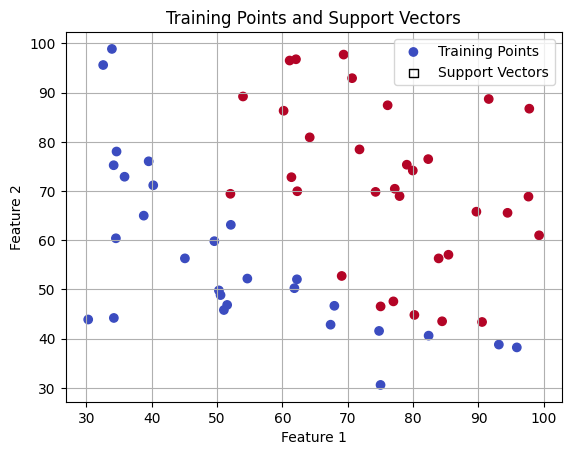

In [89]:
# Retrieve support vectors
support_vectors = X_train[alphas > 1e-4]
support_labels = y_train[alphas > 1e-4]

# Plot training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm', marker='o', label='Training Points')

# Plot support vectors
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], c=support_labels, cmap='coolwarm', marker='s', edgecolors='k', linewidths=1, label='Support Vectors')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Training Points and Support Vectors')
plt.legend()
plt.grid(True)
plt.show()